<a href="https://colab.research.google.com/github/AaryanGotad/ml-practice/blob/main/tensorflow_practice/01_neural_network_regression_with_tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to regression with Neural Networks in TensorFlow

There are many definitions for a regression problem but in our case, we're going to simplify: predicting a numerical variable nased on some other combination of variables, even shorter... predicting a number.

In [1]:
# import tensorflow
import tensorflow as tf
print(tf.__version__)

2.19.0


### Creating some data to view and fit

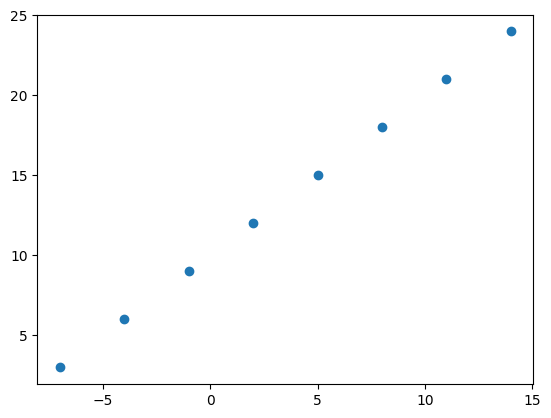

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Create features
X = np.array([-7.0, -4.0, -1.0, 2.0, 5.0, 8.0, 11.0, 14.0])

# Create labels
y = np.array([3.0, 6.0, 9.0, 12.0, 15.0, 18.0, 21.0, 24.0])

# Visualise it
plt.scatter(X, y)

In [3]:
y == X + 10

array([ True,  True,  True,  True,  True,  True,  True,  True])

### Input and output shapes

In [4]:
# Create a demo tensor for our housing price prediction problem
house_info  = tf.constant(["bedroom", "bathroom", "garage"])
house_price = tf.constant([939700])
house_info, house_price

(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedroom', b'bathroom', b'garage'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([939700], dtype=int32)>)

In [5]:
X[0], y[0]

(np.float64(-7.0), np.float64(3.0))

In [6]:
X[1], y[1]

(np.float64(-4.0), np.float64(6.0))

In [7]:
input_shape = X[0].shape
output_shape = y[0].shape
input_shape, output_shape

((), ())

In [8]:
X[0].ndim

0

In [9]:
X[0], y[0]

(np.float64(-7.0), np.float64(3.0))

In [10]:
# Turn our numpy arrays into tensors
X = tf.constant(X)
y = tf.constant(y)
X, y

(<tf.Tensor: shape=(8,), dtype=float64, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

In [11]:
input_shape = X[0].shape
output_shape = y[0].shape
input_shape, output_shape

(TensorShape([]), TensorShape([]))

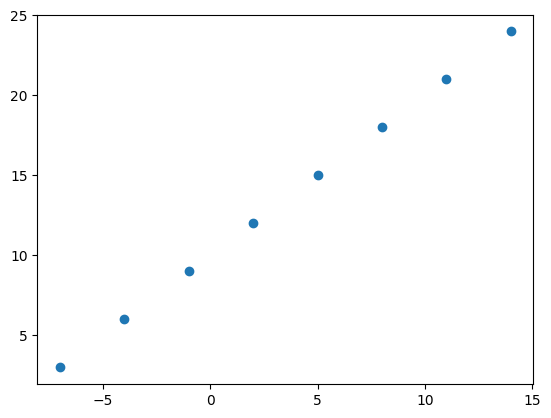

In [12]:
plt.scatter(X, y)

### Steps in modelling with TensorFlow

1. **Creating a model** - define the input and output layers, as well as the hidden layers of a deep learning model.
2. **Compiling a model** - define the loss funtions (in other words, the function which tells our model how wrong it is) the optimizer (tells our model how to improce the patterns its learning) and evaluation metrics (what we can use to interpret the performance of our model).
3. **Fitting a model** - letting the model try to find patterns between X & y (features and labels).

In [16]:
# Set random seed
tf.random.set_seed(42)

#1. Create a model using Sequential API
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

#2. Compile the model
model.compile(loss=tf.keras.losses.mae, # mae is short for mean absolute error
              optimizer=tf.keras.optimizers.SGD(), # SGD is short for stochastic gradient descent
              metrics=["mae"])

#3. Fit the model
model.fit(tf.expand_dims(X, axis=1), y, epochs=5)

Epoch 1/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 574ms/step - loss: 16.1859 - mae: 16.1859
Epoch 2/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 15.9047 - mae: 15.9047
Epoch 3/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - loss: 15.6234 - mae: 15.6234
Epoch 4/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - loss: 15.3422 - mae: 15.3422
Epoch 5/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - loss: 15.0609 - mae: 15.0609


In [17]:
# Check out X and y
X, y

(<tf.Tensor: shape=(8,), dtype=float64, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

In [20]:
# Try and make a prediction using our model
y_pred = model.predict(tf.expand_dims(tf.constant([17.0]), axis=1))
y_pred

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


array([[-6.6259117]], dtype=float32)

In [21]:
y_pred + 15

array([[8.374088]], dtype=float32)

### Improving our model

We can improve our model, by altering the steps we took to create a model.

1. **Creating a model** - here we might add more layers, increase the number of units (also called neurons) within each of the hidden layers, change the activation function of each layer.
2. **Compiling a model** - here we might change the optimization function or perhaps tje **learning rate** of the optimization function
3. **Fitting a model** - here we might fit a model for more **epochs** (leave it training for longer) or on more data (give the model more examples to learn from)

In [23]:
# Let's rebuild our model

# 1. Create the model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

# 3. Fit the model (this time we'll train for longer)
model.fit(tf.expand_dims(X, axis=1), y, epochs=100)

Epoch 1/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 406ms/step - loss: 10.9123 - mae: 10.9123
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - loss: 10.7798 - mae: 10.7798
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 10.6473 - mae: 10.6473
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - loss: 10.5148 - mae: 10.5148
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - loss: 10.3823 - mae: 10.3823
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 10.2498 - mae: 10.2498
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - loss: 10.1173 - mae: 10.1173
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - loss: 9.9848 - mae: 9.9848
Epoch 9/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - loss: 9.8523 - mae: 9.8523
Epoch 10/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - loss: 9.7198 - mae: 9.7198
Epoch 11/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - loss: 9.5873 - mae: 9.5873
Epoch 12/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - loss: 9.4548 - mae: 9.4548
Epoch 13/100
1/1 ━━━━━━━━━━━━━━━━━

In [24]:
# Remind ourselves of the data
X, y

(<tf.Tensor: shape=(8,), dtype=float64, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

In [26]:
# Let's see if our model's prediction has improved
model.predict(tf.expand_dims(tf.constant([17.0]), axis=1))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


array([[30.048717]], dtype=float32)